In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
data["online_order"].value_counts()


Yes    30444
No     21273
Name: online_order, dtype: int64

Which are the top restaurant chains in Bangaluru?

Text(0, 0.5, 'Name of Restaurants')

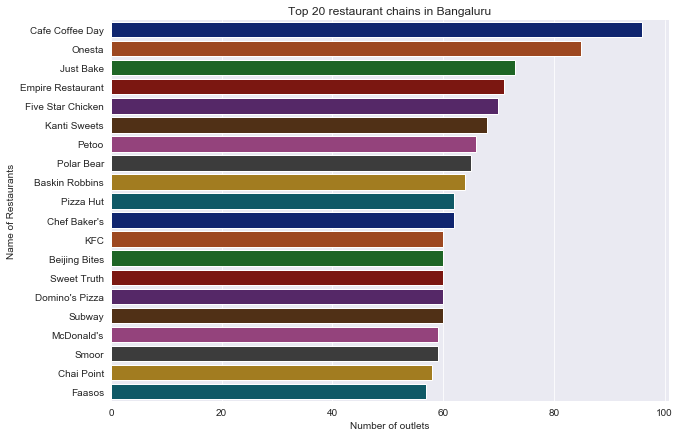

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
chains= data['name'].value_counts()[:20]
#online= df['']
sns.barplot(x= chains, y = chains.index, palette= 'dark')
sns.despine()
plt.title('Top 20 restaurant chains in Bangaluru')
plt.xlabel('Number of outlets')
plt.ylabel('Name of Restaurants')

In [7]:
chains

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Chef Baker's         62
KFC                  60
Beijing Bites        60
Sweet Truth          60
Domino's Pizza       60
Subway               60
McDonald's           59
Smoor                59
Chai Point           58
Faasos               57
Name: name, dtype: int64

In [8]:
chains.index

Index(['Cafe Coffee Day', 'Onesta', 'Just Bake', 'Empire Restaurant',
       'Five Star Chicken', 'Kanti Sweets', 'Petoo', 'Polar Bear',
       'Baskin Robbins', 'Pizza Hut', 'Chef Baker's', 'KFC', 'Beijing Bites',
       'Sweet Truth', 'Domino's Pizza', 'Subway', 'McDonald's', 'Smoor',
       'Chai Point', 'Faasos'],
      dtype='object')

WE OBSERVE THE FOLLOWING:

Cafee Cofee Day has the most number of outlets in the city of bangaluru.
McDonald's is on the 17th number according to number of outlets.

In [9]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
type(data["rate"])

pandas.core.series.Series

In [11]:
# Replacing restaurents with there ratings given as new to NAN and dopping them finally
data['rate']=data['rate'].replace('NEW',np.NAN)
data['rate']=data['rate'].replace('-',np.NAN)
data.dropna(how='any',inplace=True)

In [12]:
data["rate"]

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
5         3.8/5
7         4.6/5
8         4.0/5
9         4.2/5
10        4.1/5
11        4.2/5
12        4.2/5
13        4.0/5
14        3.8/5
15        3.8/5
16        3.9/5
17        3.8/5
18        3.9/5
20        3.0/5
21        3.7/5
23        3.6/5
29        3.8/5
30        4.0/5
31        2.8/5
33        3.9/5
34        4.2/5
35        3.9/5
37        4.2/5
38        4.4/5
40        3.8/5
          ...  
51677    2.5 /5
51681    4.3 /5
51682    4.5 /5
51683    4.1 /5
51684    4.3 /5
51685    4.7 /5
51686    4.6 /5
51687    4.4 /5
51688    4.0 /5
51689    4.1 /5
51690    4.2 /5
51691    4.2 /5
51692    3.9 /5
51693    4.1 /5
51694    4.1 /5
51695    4.2 /5
51696    4.3 /5
51697    4.4 /5
51698    3.9 /5
51699    4.1 /5
51700    4.1 /5
51701    4.1 /5
51702    4.0 /5
51703    3.9 /5
51704    4.0 /5
51705    3.8 /5
51707    3.9 /5
51708    2.8 /5
51711    2.5 /5
51715    4.3 /5
Name: rate, Length: 2304

In [13]:
data['rate']=data.loc[:,'rate'].replace('[ ]','',regex=True)

In [14]:
data["rate"][:5]

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
Name: rate, dtype: object

In [15]:
data['rate']=data['rate'].astype(str)
data['rate']=data['rate'].apply(lambda r:r.replace('/5',''))

In [16]:
data["rate"][:5]

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [17]:
data['rate']=data.loc[:,'rate'].replace('[ ]','',regex=True)
data['rate']=data['rate'].astype(str)
data['rate']=data['rate'].apply(lambda r:r.replace('/5',''))
data['rate']=data['rate'].apply(lambda r:float(r))

In [18]:
# now converting cost from string to integer 
data['approx_cost(for two people)']=data['approx_cost(for two people)'].str.replace(',','')
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(int)

In [19]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [20]:
data["online_order"].value_counts()

Yes    16297
No      6749
Name: online_order, dtype: int64

In [21]:
location = data["location"]

In [22]:
def show_Restaurants_according_to_search(Location=location,
                                         Restaurant_Type=['Buffet', 
                                             'Cafes',
                                             'Delivery',
                                             'Desserts',
                                             'Dine-out',
                                             'Drinks & nightlife',
                                             'Pubs and bars'],
                            Min_Rating=(0,5,0.1),
                            Max_Cost_For_Two_People=(100,5000,50)):
    print("")
    return data[ (data['rate'] > Min_Rating) 
                &(data['listed_in(type)'] == Restaurant_Type) 
                &(data['location'] == Location) 
                & (data['approx_cost(for two people)'] < Max_Cost_For_Two_People)]


In [23]:
print('number of restaurents with online delivery')
(data.online_order == 'Yes').sum()

number of restaurents with online delivery


16297

In [24]:
print('Number of restaurents which does not deliver online')
(data.online_order == 'No').sum()

Number of restaurents which does not deliver online


6749

Text(0.5, 1.0, 'Restuarents delivering online or not')

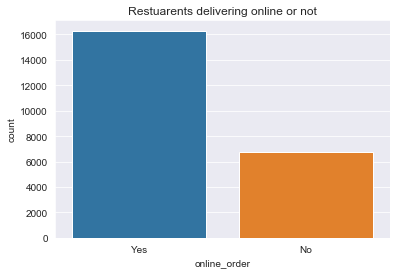

In [25]:
sns.countplot(x=data['online_order'])
plt.title('Restuarents delivering online or not')

Text(0.5, 1.0, 'Type of restaurents delivering online or not')

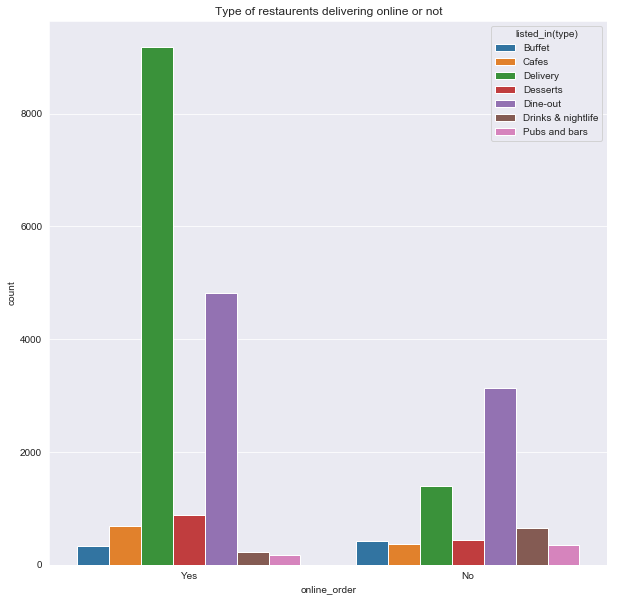

In [26]:
sns.countplot(x=data['online_order'],hue=data['listed_in(type)'],)
fig = plt.gcf()  # here gcf means 'GET THE CURRENT FIGURE'
fig.set_size_inches(10,10)
plt.title('Type of restaurents delivering online or not')


In [27]:
data["book_table"]

0        Yes
1         No
2         No
3         No
4         No
5         No
7        Yes
8         No
9         No
10        No
11       Yes
12       Yes
13        No
14        No
15        No
16        No
17        No
18        No
20        No
21        No
23        No
29        No
30        No
31        No
33        No
34        No
35        No
37        No
38        No
40        No
        ... 
51677     No
51681    Yes
51682    Yes
51683    Yes
51684    Yes
51685    Yes
51686     No
51687    Yes
51688    Yes
51689    Yes
51690    Yes
51691    Yes
51692    Yes
51693    Yes
51694     No
51695    Yes
51696    Yes
51697    Yes
51698     No
51699    Yes
51700    Yes
51701    Yes
51702     No
51703    Yes
51704    Yes
51705    Yes
51707     No
51708     No
51711     No
51715    Yes
Name: book_table, Length: 23046, dtype: object

In [28]:
print("Number of restaurents with table booking facility")
(data.book_table == 'Yes').sum()

Number of restaurents with table booking facility


6041

In [29]:
print('Number of restaurents without table facility')
(data.book_table == 'No').sum()

Number of restaurents without table facility


17005

Text(0.5, 1.0, 'Restaurents providing table booking facility')

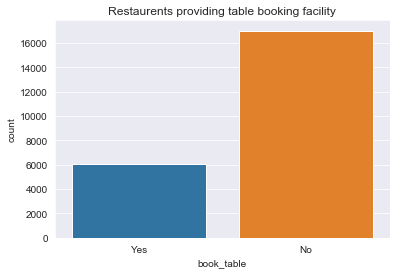

In [30]:
sns.countplot(x=data['book_table'])
#fig=plt.gcf()
#fig.set_size_inches(8,8)
plt.title('Restaurents providing table booking facility')

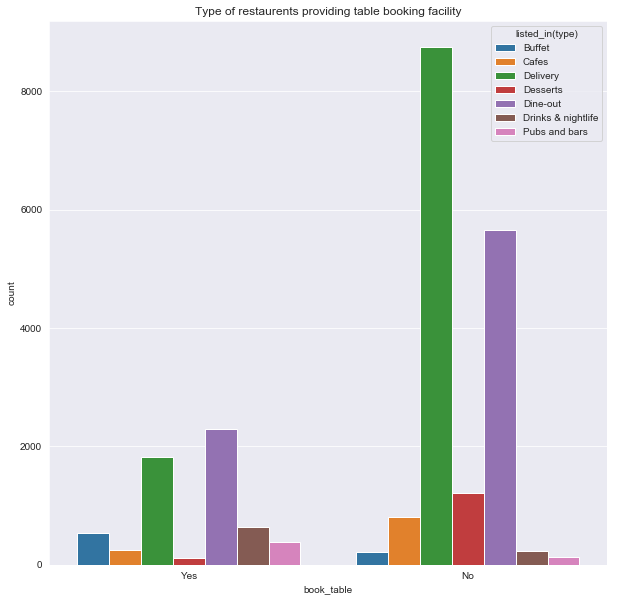

In [31]:
sns.countplot(x=data['book_table'],hue=data['listed_in(type)'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Type of restaurents providing table booking facility")
plt.show()

In [32]:
print('Restaurents on there unique ratings')
data.rate.unique()

Restaurents on there unique ratings


array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [33]:
data.rate >= 1.5

0        True
1        True
2        True
3        True
4        True
5        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
20       True
21       True
23       True
29       True
30       True
31       True
33       True
34       True
35       True
37       True
38       True
40       True
         ... 
51677    True
51681    True
51682    True
51683    True
51684    True
51685    True
51686    True
51687    True
51688    True
51689    True
51690    True
51691    True
51692    True
51693    True
51694    True
51695    True
51696    True
51697    True
51698    True
51699    True
51700    True
51701    True
51702    True
51703    True
51704    True
51705    True
51707    True
51708    True
51711    True
51715    True
Name: rate, Length: 23046, dtype: bool

In [34]:
print("Number of restaurents rating between 1.5 and 2")
((data.rate>=1.5) & (data.rate<2)).sum()

Number of restaurents rating between 1.5 and 2


5

In [35]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [36]:
print('number of restaurents rating between 2.5 and 3')
((data.rate>=2.5) & (data.rate<3)).sum()


number of restaurents rating between 2.5 and 3


1009

In [37]:
print('number of restaurents rating between 4.5 and 5')
((data.rate>=4.5)&(data.rate<=5)).sum()

number of restaurents rating between 4.5 and 5


1212

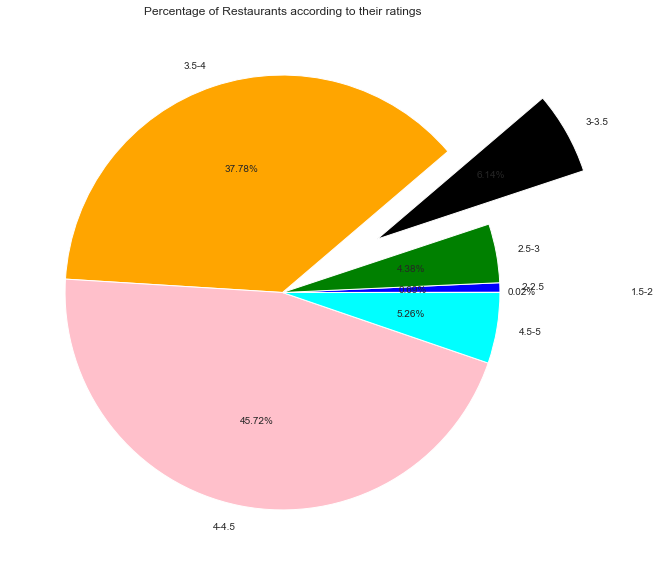

In [38]:
slices=[((data.rate>=1.5) & (data.rate<2)).sum(),
        ((data.rate>=2) & (data.rate<2.5)).sum(),
        ((data.rate>=2.5) & (data.rate<3)).sum(),
        ((data.rate>=3.0) & (data.rate<3.5)).sum(),
        ((data.rate>=3.5) & (data.rate<4)).sum(),
        ((data.rate>=4) & (data.rate<4.5)).sum(),
        ((data.rate>=4.5) & (data.rate<5)).sum()
       ]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['Red','blue','Green','black','orange','pink',"cyan"]
explode = [0.5,0,0,0.5,0,0,0]
plt.pie(slices,colors=colors, labels=labels, autopct='%1.02f%%',explode = explode)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

Analysis of Restaurants based on their online order and how rating is related to it

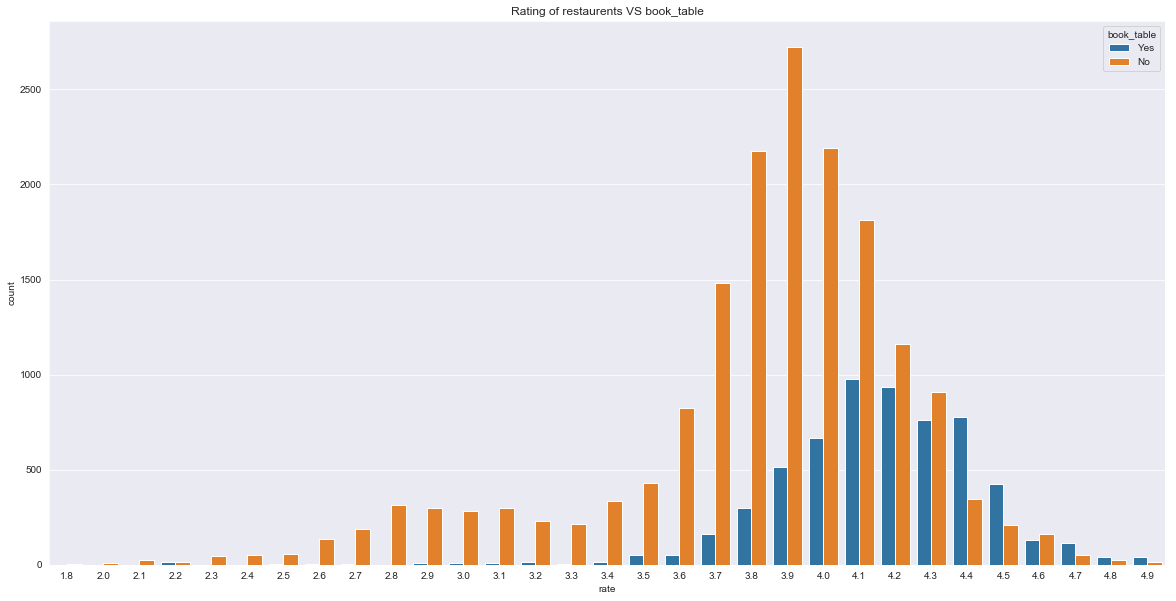

In [40]:
plt.figure(figsize=(20,10))
Aa=sns.countplot(x='rate',hue='book_table',data=data)
plt.title('Rating of restaurents VS book_table')
plt.show()


In [ ]:
plt.figure(figsize=(20,10))
Aa=sns.countplot(x='rate',hue='online_order',data=data)
plt.title('Rating of restaurents VS book_table')
plt.show()

In [ ]:
ANALYSIS OF RESTAURENTS BASED ON THEIR LOCATION

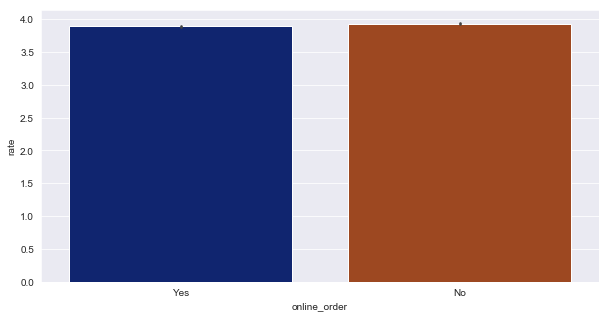

In [42]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(x=data.online_order,y=data.rate,palette="dark")


In [48]:
print("All unique locations of restaurents in bangalore")
data.location.nunique()

All unique locations of restaurents in bangalore


88

In [44]:
dt = data.location.value_counts()[:10]

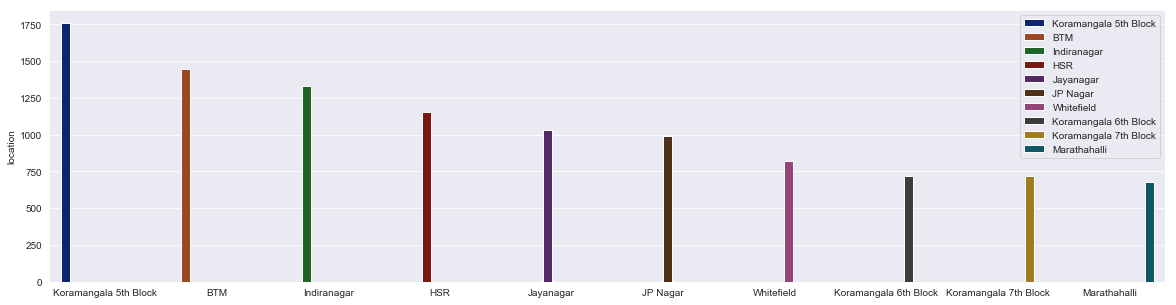

In [45]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
sns.barplot(x=dt.index,y=dt,palette="dark",hue=dt.index)


In [43]:
print("count of restaurents at unique locations")
locationCount=data['location'].value_counts().sort_values(ascending=True)
locationCount

count of restaurents at unique locations


KR Puram                            1
Rajarajeshwari Nagar                2
Kanakapura Road                     2
Yelahanka                           2
West Bangalore                      2
Magadi Road                         2
Jalahalli                           3
North Bangalore                     3
Central Bangalore                   3
Mysore Road                         4
Uttarahalli                         4
Rammurthy Nagar                     6
East Bangalore                      8
CV Raman Nagar                     14
City Market                        14
Vijay Nagar                        15
Old Madras Road                    16
Sanjay Nagar                       17
Koramangala                        17
Sankey Road                        17
South Bangalore                    19
Sahakara Nagar                     20
RT Nagar                           22
Langford Town                      22
Yeshwantpur                        24
Hosur Road                         24
Majestic    

In [46]:
# Now lets check the location where there is maximum number of restaurents.
print('Maximum number of restaurents is at:')
count_max=max(locationCount)
for x,y in locationCount.items():
    if(y==count_max):
        print(x)

Maximum number of restaurents is at:
Koramangala 5th Block


In [ ]:
# now, lets find the location where there is minimum number of restaurents.
print('Minimum number of restaurents at :')
count_min=min(locationCount)
for x,y in locationCount.items():
    if(y==count_min):
        print(x)

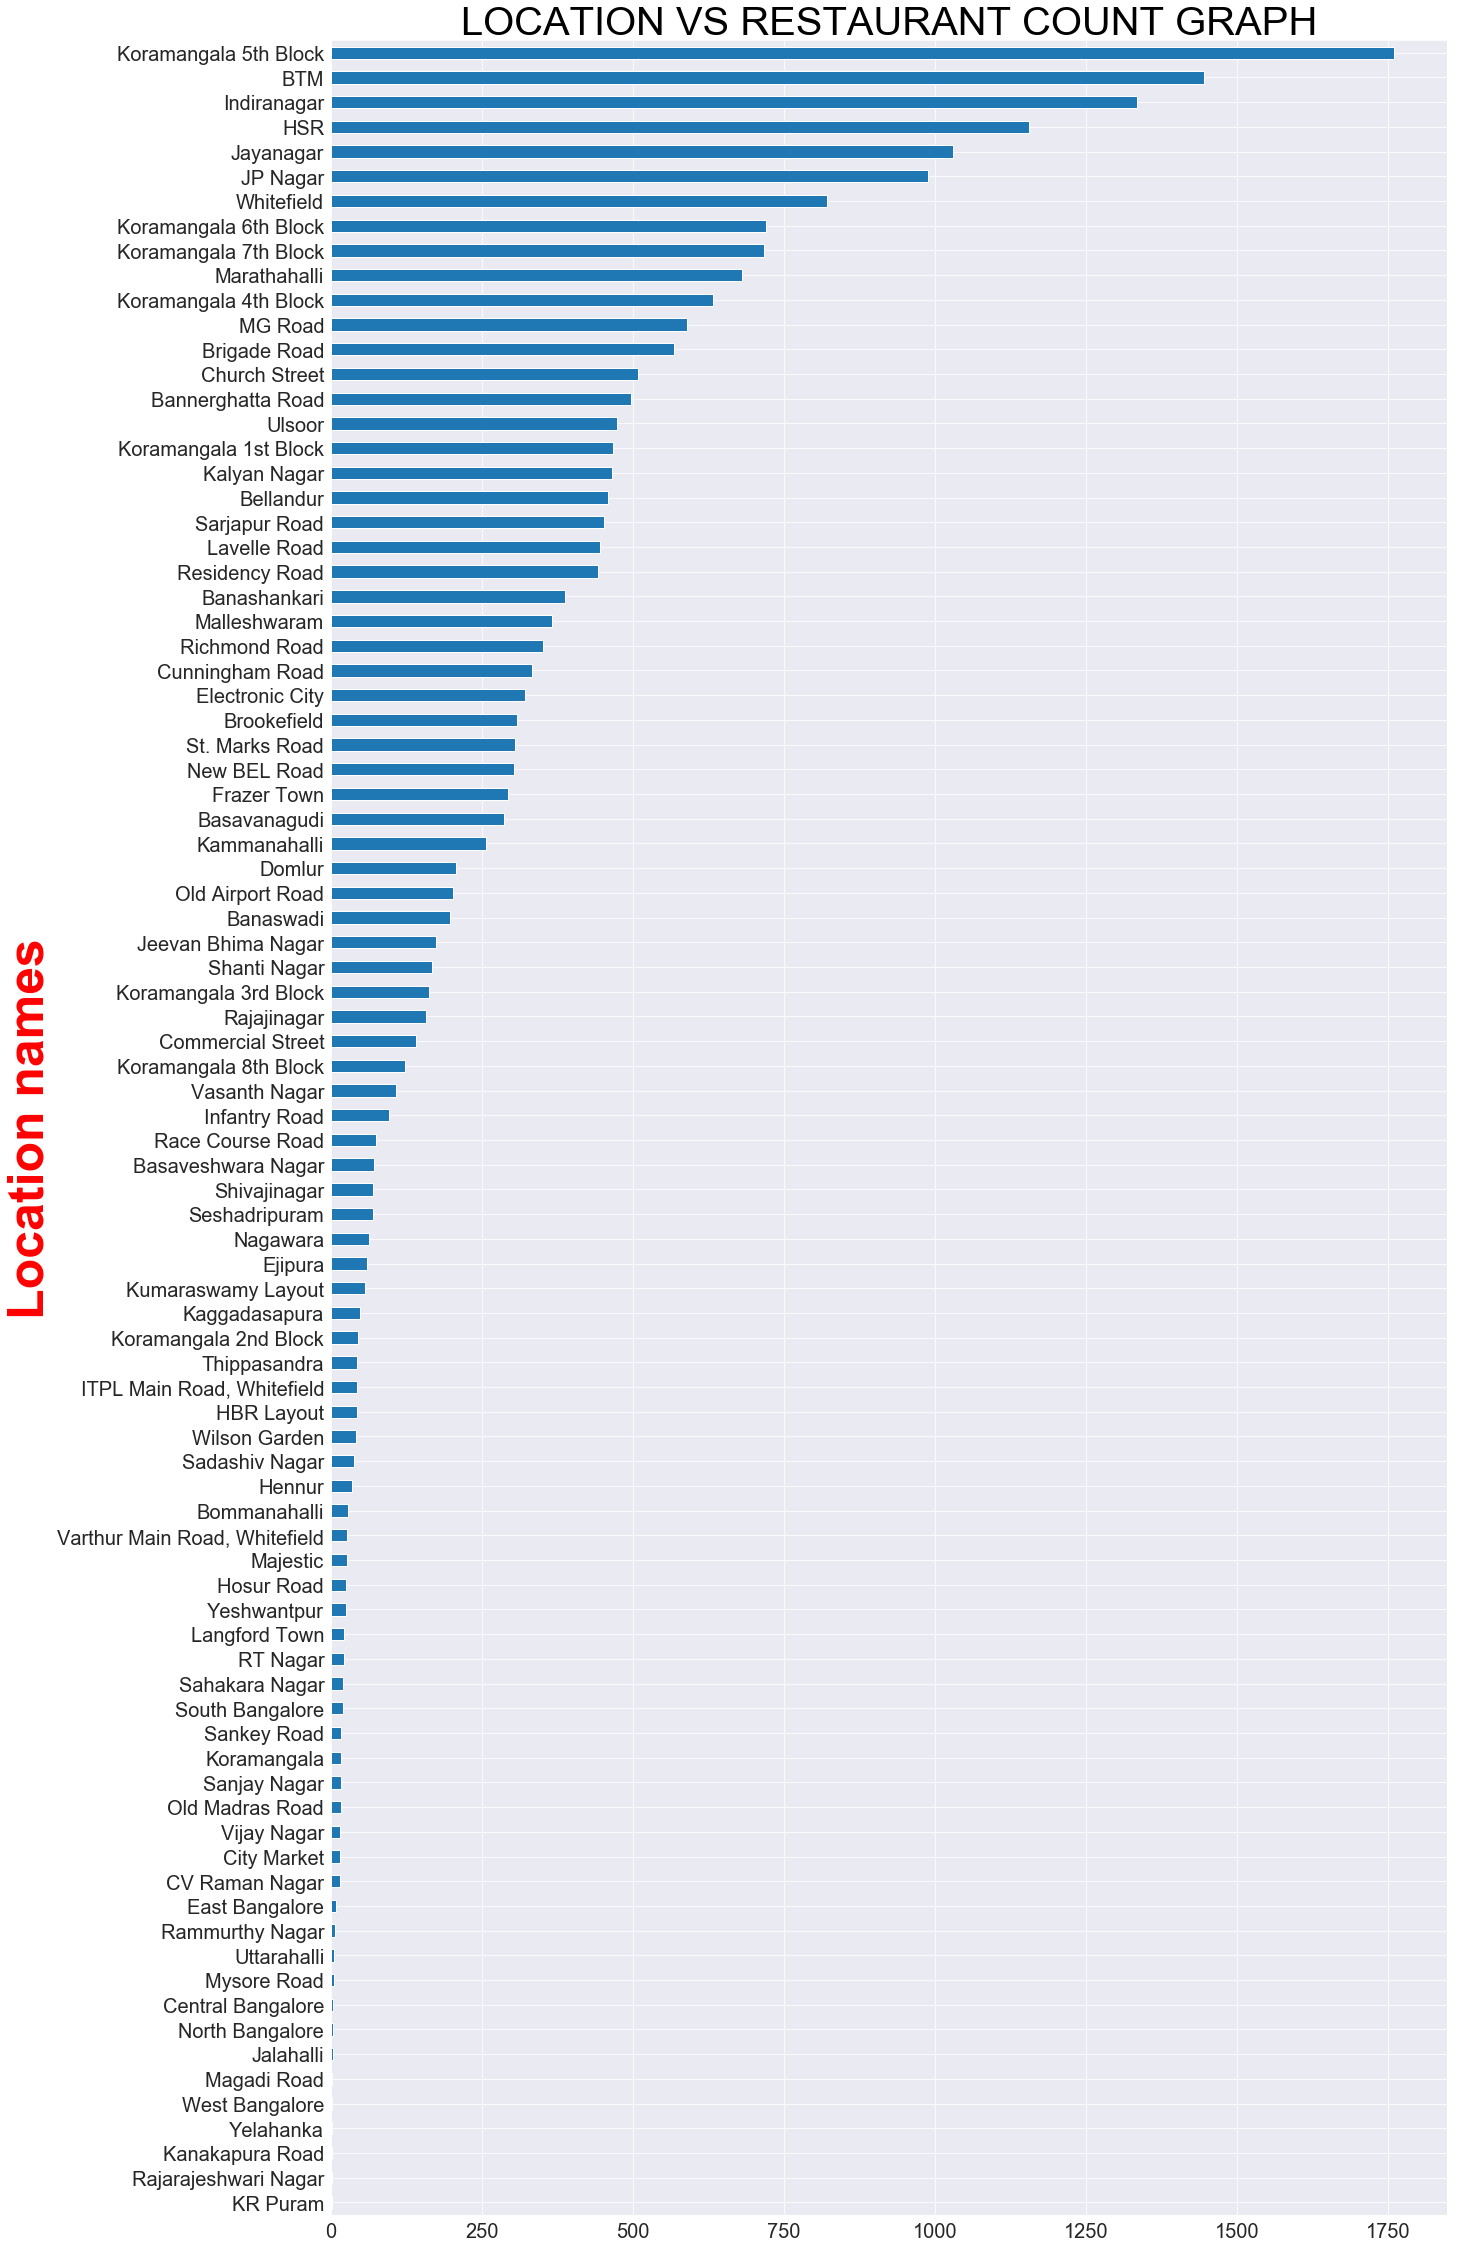

In [47]:
fig=plt.figure(figsize=(20,40))
locationCount.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="red",fontweight='bold')
plt.title("LOCATION VS RESTAURANT COUNT GRAPH",fontsize=40,color="BLACK")
plt.show()

In [ ]:
ANALYSIS OF RESTAURENT BASED ON THEIR DINNING TYPE

Text(0.5, 0, 'Type of restaurant')

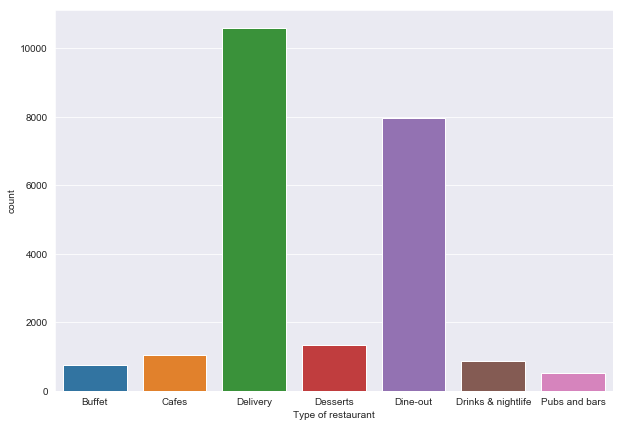

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of restaurant")


In [49]:
print('all different dinning type of restaurents')
data['listed_in(type)'].unique()

all different dinning type of restaurents


array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [52]:
print('Count of all different dinning type restaurents')
restaurantTypeCount=data['listed_in(type)'].value_counts().sort_values(ascending=True)
restaurantTypeCount

Count of all different dinning type restaurents


Pubs and bars           517
Buffet                  753
Drinks & nightlife      871
Cafes                  1046
Desserts               1330
Dine-out               7954
Delivery              10575
Name: listed_in(type), dtype: int64

In [53]:
data['listed_in(type)'].value_counts()  

Delivery              10575
Dine-out               7954
Desserts               1330
Cafes                  1046
Drinks & nightlife      871
Buffet                  753
Pubs and bars           517
Name: listed_in(type), dtype: int64

ANALYSIS ON THE BASIS OF FOOD TYPE

Now, lets try to get all the North Indian food serving restaurents

In [57]:
data["cuisines"]


0                           North Indian, Mughlai, Chinese
1                              Chinese, North Indian, Thai
2                                   Cafe, Mexican, Italian
3                               South Indian, North Indian
4                                 North Indian, Rajasthani
5                                             North Indian
7                                     Pizza, Cafe, Italian
8                               Cafe, Italian, Continental
9                 Cafe, Mexican, Italian, Momos, Beverages
10                                                    Cafe
11                              Cafe, Italian, Continental
12                     Cafe, Chinese, Continental, Italian
13                                       Cafe, Continental
14                                  Cafe, Mexican, Italian
15                                                    Cafe
16            Cafe, Fast Food, Continental, Chinese, Momos
17                                  Chinese, Cafe, Itali

In [58]:
(data['cuisines']=='North Indian').sum()


1136

In [59]:
data.cuisines.value_counts() 

North Indian                                            1136
North Indian, Chinese                                    777
South Indian                                             359
Cafe                                                     273
South Indian, North Indian, Chinese                      233
Bakery, Desserts                                         215
Desserts, Beverages                                      214
Chinese                                                  210
Ice Cream, Desserts                                      208
Desserts                                                 204
Biryani                                                  167
Chinese, Momos                                           162
Finger Food                                              151
Fast Food                                                150
Mithai, Street Food                                      138
North Indian, Chinese, Biryani                           137
Burger, Fast Food       

In [54]:
NorthIndianFoodRestaurants = data[data['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodRestaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


In [80]:
NorthIndianFoodRestaurants["name"].nunique()

1534

In [60]:
#try to get all the South Indain food serving restaurents

SouthIndianFoodRestaurants = data[data['cuisines'].str.contains('South Indian', case=False, regex=True,na=False)]
SouthIndianFoodRestaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
38,https://www.zomato.com/bangalore/empire-restau...,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,Yes,No,4.4,4884,080 49653266,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari
53,https://www.zomato.com/bangalore/biryanis-and-...,"178, Next To Old KEB Office, 8th F Main Road, ...",Biryanis And More,Yes,No,4.0,618,080 48542442\r\n+91 7337271771,Jayanagar,Casual Dining,"Prawn Biryani, Dragon Chicken, Chicken Boneles...","Biryani, North Indian, Chinese, Andhra, South ...",750,"[('Rated 5.0', ""RATED\n Dear Biryanis and mor...",[],Delivery,Banashankari
76,https://www.zomato.com/bangalore/sri-guru-kott...,"49/1, Subbaraoshetty Road, Netkallappa Circle,...",Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,+91 9448305384\r\n+91 9060079480,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...","['Benne Dose', 'Benne Kali Dose', 'Open Dose',...",Delivery,Banashankari
79,https://www.zomato.com/bangalore/upahar-sagar-...,"727, 23rd Cross, KR Road, 2nd Stage, Banashank...",Upahar Sagar,No,No,3.8,39,+91 9164571705\r\n080 26760336,Banashankari,Quick Bites,Masala Dosa,"South Indian, Chinese, North Indian",350,"[('Rated 2.0', ""RATED\n Hi,\nWe had masala pu...",[],Delivery,Banashankari


In [ ]:
 find all the chinese food serving restaurent

In [83]:
ChineseFoodRestaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7611 entries, 0 to 51711
Data columns (total 17 columns):
url                            7611 non-null object
address                        7611 non-null object
name                           7611 non-null object
online_order                   7611 non-null object
book_table                     7611 non-null object
rate                           7611 non-null float64
votes                          7611 non-null int64
phone                          7611 non-null object
location                       7611 non-null object
rest_type                      7611 non-null object
dish_liked                     7611 non-null object
cuisines                       7611 non-null object
approx_cost(for two people)    7611 non-null int32
reviews_list                   7611 non-null object
menu_item                      7611 non-null object
listed_in(type)                7611 non-null object
listed_in(city)                7611 non-null object
dtypes: f

In [75]:
ChineseFoodRestaurants = data[data['cuisines'].str.contains('Chinese|Momos', case=False, regex=True,na=False)]
ChineseFoodRestaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
12,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
16,https://www.zomato.com/bangalore/catch-up-ino-...,"241, 4th Floor, 100 Feet Ring Road, Opposite K...",Catch-up-ino,Yes,No,3.9,133,+91 9972988038\r\n+91 9900121238,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800,"[('Rated 1.0', ""RATED\n This place is right o...",[],Cafes,Banashankari


In [82]:
ChineseFoodRestaurants["name"].value_counts().sum()

7611

In [84]:
ChineseFoodRestaurants["name"].nunique()

1178

 find Italian food serving restaurents

In [63]:
ItalianFoodRestaurants = data[data['cuisines'].str.contains('Italian|Pizza', case=False, regex=True,na=False)]
ItalianFoodRestaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
11,https://www.zomato.com/bangalore/cafe-shuffle-...,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...",Cafe Shuffle,Yes,Yes,4.2,150,+91 9742166777,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari


In [ ]:
find Mexican food serving restaurents

In [64]:
MexicanFoodRestaurants = data[data['cuisines'].str.contains('Mexican', case=False, regex=True,na=False)]
MexicanFoodRestaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
14,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Cafes,Banashankari
60,https://www.zomato.com/bangalore/peppy-peppers...,"942, 3rd Floor, 21st Main Road, 2nd Stage, Ban...",Peppy Peppers,No,No,4.2,244,+91 8042297555\r\n+91 7022455300,Banashankari,Casual Dining,"Pasta, Pepper Pizza, Paneer Pizza, Peppy Panee...","Italian, North Indian, Mexican",800,"[('Rated 4.0', ""RATED\n \nPeppy Peppers is loc...",[],Delivery,Banashankari
67,https://www.zomato.com/gustoesbeerhouse?contex...,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...",1200,"[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari


In [ ]:
get all the american food serving restaurents

In [65]:
AmericanFoodRestaurants = data[data['cuisines'].str.contains('american|Burger', case=False, regex=True,na=False)]
AmericanFoodRestaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
18,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",T3H Cafe,No,No,3.9,93,+91 8884726600,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
42,https://www.zomato.com/bangalore/mcdonalds-ban...,"2466, Bhaskar Grand Tower, 24th Cross, Opposit...",McDonald's,Yes,No,3.9,286,080 66000666\r\n080 42005285,Banashankari,Quick Bites,"Burgers, Fries, Hot Chocolate","Burger, Fast Food",500,"[('Rated 4.0', 'RATED\n Perfect place to have...",[],Delivery,Banashankari
55,https://www.zomato.com/bangalore/freshmenu-ban...,"10, Stavyah Arcade, 3rd Floor 9th Main, Yarab ...",FreshMenu,Yes,No,3.9,627,080 40424242,Banashankari,Delivery,"Salads, Sandwiches, Salad, Thai Rice, Pasta, N...","Healthy Food, Chinese, Biryani, North Indian, ...",450,"[('Rated 5.0', 'RATED\n What: continental foo...","[""Egg 'n' Chicken Ham Breakwich"", 'Maple Panca...",Delivery,Banashankari
153,https://www.zomato.com/bangalore/kfc-banashank...,"1, 80 Feet Road, 6th Block, 3rd Stage, Banasha...",KFC,Yes,No,3.8,505,080 33994444,Banashankari,Quick Bites,"Burgers, French Fries","Burger, Fast Food",450,"[('Rated 4.0', 'RATED\n KFC chicken yummy as ...",[],Delivery,Banashankari


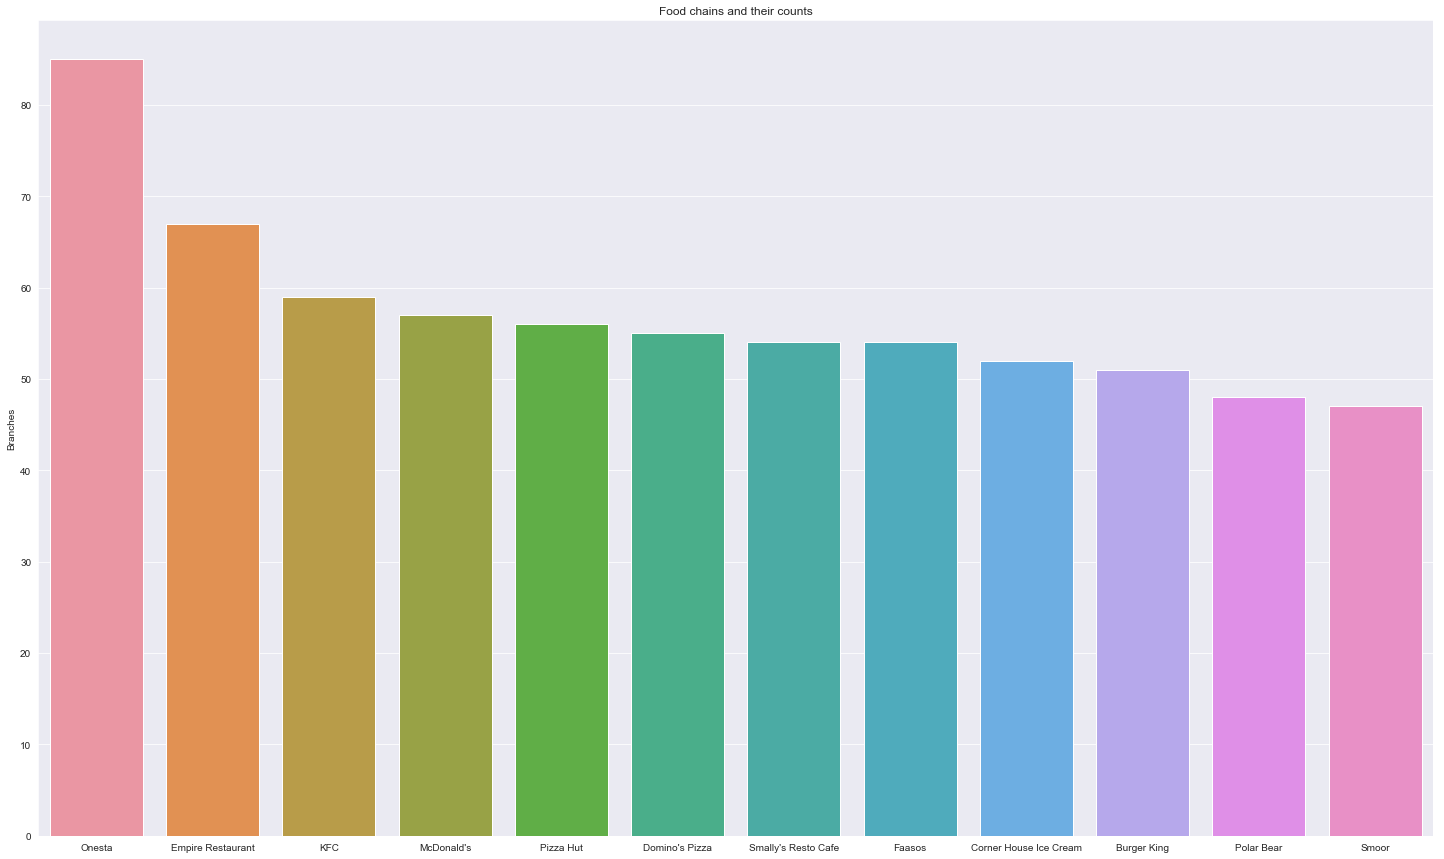

In [66]:
branches = data.groupby(['name']).size().to_frame('count').reset_index().sort_values(['count'],ascending=False)
ax = sns.barplot(x='name', y='count', data=branches[:12])
plt.xlabel('')
plt.ylabel('Branches')
plt.title('Food chains and their counts')

fig = plt.gcf()
fig.set_size_inches(25,15)

In [73]:
data[data['cuisines'].str.contains('North Indian',case='False')].value_counts()


AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [72]:
data["cuisines"].astype("str")

0                           North Indian, Mughlai, Chinese
1                              Chinese, North Indian, Thai
2                                   Cafe, Mexican, Italian
3                               South Indian, North Indian
4                                 North Indian, Rajasthani
5                                             North Indian
7                                     Pizza, Cafe, Italian
8                               Cafe, Italian, Continental
9                 Cafe, Mexican, Italian, Momos, Beverages
10                                                    Cafe
11                              Cafe, Italian, Continental
12                     Cafe, Chinese, Continental, Italian
13                                       Cafe, Continental
14                                  Cafe, Mexican, Italian
15                                                    Cafe
16            Cafe, Fast Food, Continental, Chinese, Momos
17                                  Chinese, Cafe, Itali